In [1]:
from google.colab import drive
import os

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/Colab Notebooks')

# SMOKE DETECTION USING NEURAL NETWORKS,SVM,LOGISTIC REGRESSION

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance

In [51]:
data = pd.read_csv('train_dataset.csv')

# EDA

In [ ]:
data.shape,data.columns

((38984, 23),
 Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
        'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
        'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
        'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
        'ALT', 'Gtp', 'dental caries', 'smoking'],
       dtype='object'))

In [ ]:
data.isna().sum()

,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0
relaxation,0


In [ ]:
data.dtypes

,0
age,int64
height(cm),int64
weight(kg),int64
waist(cm),float64
eyesight(left),float64
eyesight(right),float64
hearing(left),int64
hearing(right),int64
systolic,int64
relaxation,int64


In [53]:
data.duplicated().sum()

np.int64(5517)

In [54]:
data.drop_duplicates(inplace=True)

In [58]:
data.shape

(33467, 23)

In [55]:
data.head(10)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0
5,60,160,50,78.0,1.0,0.9,2,2,126,75,...,98,64,13.9,1,1.0,47,23,70,0,1
6,40,175,90,95.0,0.9,1.0,1,1,130,88,...,39,102,16.5,1,1.0,19,22,19,0,0
7,40,180,75,85.0,1.5,1.5,1,1,110,60,...,58,99,14.0,2,1.4,29,20,32,1,1
8,40,170,60,74.0,1.2,1.5,1,1,89,57,...,60,104,12.9,2,0.7,17,17,14,0,0
9,45,155,55,78.0,0.7,1.0,1,1,114,81,...,41,107,13.1,1,0.6,22,15,56,0,0


In [59]:
binary = []
for i in data.columns:
  if data[i].nunique() <= 2:
    binary.append(i)
    print(i,data[i].nunique())
  else:
    print(i,data[i].nunique())

age 14
height(cm) 13
weight(kg) 22
waist(cm) 545
eyesight(left) 19
eyesight(right) 17
hearing(left) 2
hearing(right) 2
systolic 125
relaxation 94
fasting blood sugar 258
Cholesterol 279
triglyceride 389
HDL 122
LDL 286
hemoglobin 143
Urine protein 6
serum creatinine 34
AST 195
ALT 230
Gtp 439
dental caries 2
smoking 2


In [60]:
target = data['smoking']
train_data = data.drop(['smoking'],axis=1)

In [61]:
X_train,X_test,y_train,y_test = train_test_split(train_data,target,test_size = 0.2,random_state = 0)

In [62]:
data.dtypes

,0
age,int64
height(cm),int64
weight(kg),int64
waist(cm),float64
eyesight(left),float64
eyesight(right),float64
hearing(left),int64
hearing(right),int64
systolic,int64
relaxation,int64


# FEATURE ENHANCEMENT

In [63]:
data['BMI'] = data['weight(kg)'] / ((data['height(cm)'] / 100) ** 2)

data['waist_height_ratio'] = data['waist(cm)'] / data['height(cm)']

data['avg_eyesight'] = (data['eyesight(left)'] + data['eyesight(right)']) / 2

data['avg_hearing'] = (data['hearing(left)'] + data['hearing(right)']) / 2

data['cholesterol_ratio'] = data['HDL'] / data['LDL']

# FEATURE NORMALIZATION : Z-Score

In [64]:
for i in X_train.columns:
  if i not in binary:
    X_train[i] = (X_train[i]-X_train[i].mean())/X_train[i].std()

In [65]:
data.tail(5)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,AST,ALT,Gtp,dental caries,smoking,BMI,waist_height_ratio,avg_eyesight,avg_hearing,cholesterol_ratio
38978,40,170,65,77.0,1.5,1.5,1,1,110,62,...,28,43,36,1,1,22.491349,0.452941,1.50,1.0,0.868132
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,18,18,21,1,0,22.038567,0.484848,0.50,1.0,0.847222
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,...,23,11,12,0,0,22.892820,0.483871,1.35,1.0,0.580153
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,24,20,17,0,1,21.484375,0.468750,1.50,1.0,0.681034
38983,55,175,60,81.1,1.0,1.0,1,1,114,66,...,18,12,16,0,1,19.591837,0.463429,1.00,1.0,0.467153


# LOGISTIC_REGRESSION

In [66]:
model = LogisticRegression(random_state=42,fit_intercept = True)
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

# FEATURE IMPORTANCE

In [67]:
imp = abs(model.coef_[0])

<BarContainer object of 22 artists>

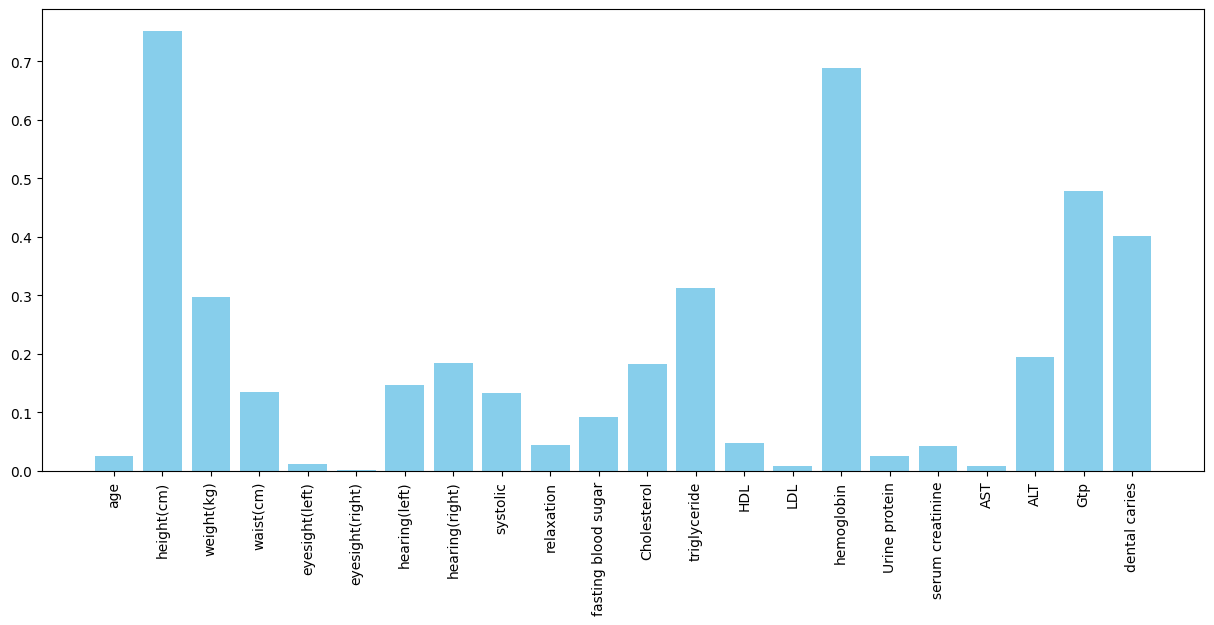

In [69]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.bar(X_train.columns,imp,color = "skyblue")

In [70]:
for i in X_test.columns:
  if i not in binary:
    X_test[i] = (X_test[i]-X_test[i].mean())/X_test[i].std()

In [71]:
X_test.tail(5)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
22147,-0.336397,1.653708,1.067926,0.637051,0.353012,0.449462,1,1,-0.112029,1.351573,...,0.713386,-0.576855,-0.107506,0.234494,-0.21599,0.510202,0.259300,0.468016,2.261270,1
14249,0.895465,-0.516120,-0.841550,-0.963598,-0.030540,0.002039,1,1,0.330883,-0.321959,...,-1.136647,0.238704,-0.131020,-1.647180,-0.21599,-1.322281,0.370641,-0.237801,-0.567723,1
33133,0.895465,-0.516120,-0.459655,-0.088577,-0.030540,-0.669097,1,1,0.257064,0.305615,...,-0.538944,0.238704,0.433316,-0.479244,-0.21599,-0.864160,-0.130394,0.050942,-0.292682,0
20655,0.484844,0.568794,0.686031,0.103501,-0.414091,-0.892808,1,1,-0.112029,0.410211,...,-0.410865,-0.984634,0.644943,0.818462,-0.21599,0.968322,-0.241735,-0.077388,-0.390911,0
21734,0.895465,-1.058577,-0.077760,0.423631,-0.414091,-0.669097,1,1,-1.293130,-1.158726,...,-0.311248,-0.780744,0.644943,-0.803671,-0.21599,-0.406040,-0.297406,-0.366132,-0.508786,0


In [72]:
X_train_1 = abs(X_train)

In [73]:
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [74]:
y_pred = model.predict(X_test)

# ACCURACY

In [75]:
accuracy_score(y_test,y_pred)

0.7270690170301762

# SVM

In [76]:
import numpy as np

In [77]:
data.head(10)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,AST,ALT,Gtp,dental caries,smoking,BMI,waist_height_ratio,avg_eyesight,avg_hearing,cholesterol_ratio
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,61,115,125,1,1,29.411765,0.570588,0.90,1.0,0.492958
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,19,25,30,1,0,35.918367,0.628571,0.80,1.0,0.622807
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,1090,1400,276,0,0,27.055151,0.554839,0.90,1.0,0.508929
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,32,36,36,0,0,29.384757,0.569697,0.75,1.0,0.505495
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,26,28,15,0,0,22.038567,0.490909,0.80,1.0,0.510870
5,60,160,50,78.0,1.0,0.9,2,2,126,75,...,47,23,70,0,1,19.531250,0.487500,0.95,2.0,1.531250
6,40,175,90,95.0,0.9,1.0,1,1,130,88,...,19,22,19,0,0,29.387755,0.542857,0.95,1.0,0.382353
7,40,180,75,85.0,1.5,1.5,1,1,110,60,...,29,20,32,1,1,23.148148,0.472222,1.50,1.0,0.585859
8,40,170,60,74.0,1.2,1.5,1,1,89,57,...,17,17,14,0,0,20.761246,0.435294,1.35,1.0,0.576923
9,45,155,55,78.0,0.7,1.0,1,1,114,81,...,22,15,56,0,0,22.892820,0.503226,0.85,1.0,0.383178


In [80]:
model = SVC()

In [81]:
model.fit(X_train,y_train)

SVC()

In [82]:
y_predict_svm = model.predict(X_test)

# ACCURACY

In [83]:
accuracy_score(y_test,y_predict_svm)

0.754705706602928

In [84]:
print(classification_report(y_test,y_predict_svm))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      4291
           1       0.66      0.66      0.66      2403

    accuracy                           0.75      6694
   macro avg       0.73      0.73      0.73      6694
weighted avg       0.76      0.75      0.75      6694



In [ ]:
data = pd.read_csv('train_dataset.csv')

In [85]:
data['BMI'] = data['weight(kg)'] / ((data['height(cm)'] / 100) ** 2)

data['waist_height_ratio'] = data['waist(cm)'] / data['height(cm)']

data['avg_eyesight'] = (data['eyesight(left)'] + data['eyesight(right)']) / 2

data['avg_hearing'] = (data['hearing(left)'] + data['hearing(right)']) / 2

data['cholesterol_ratio'] = data['HDL'] / data['LDL']

# NEURAL NETWORKS

In [86]:
df = pd.read_csv('train_dataset.csv')

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

X = df.drop(['smoking'], axis=1)
y = df['smoking']

initial_rows = X.shape[0]
df.dropna(inplace=True)
if df.shape[0] < initial_rows:
    print(f"Warning: Dropped {initial_rows - df.shape[0]} rows with missing values.")

numerical_features = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_dim = X_train_scaled.shape[1]
print(f"Input dimension (number of features): {input_dim}")


def build_nn_model(input_dim):

    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),

        Dense(64, activation='relu'),
        Dropout(0.3),

        Dense(32, activation='relu'),
        Dropout(0.2),

        Dense(1, activation='sigmoid')
    ])


    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC']
    )
    return model

nn_model = build_nn_model(input_dim)
nn_model.summary()

early_stopper = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

print("\nStarting model training...")

history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=40,
    batch_size=64,
    validation_split=0.15,
    callbacks=[early_stopper],
    verbose=2
)

print("Training finished.")

loss, accuracy, auc = nn_model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"\n--- Model Evaluation on Test Set ---")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")

y_pred_proba = nn_model.predict(X_test_scaled).flatten()

y_pred = (y_pred_proba > 0.5).astype(int)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

final_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score (Final Check): {final_auc:.4f}")

Input dimension (number of features): 22


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,313 (52.00 KB)

 Trainable params: 13,313 (52.00 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/40
415/415 - 6s - 15ms/step - AUC: 0.7873 - accuracy: 0.7142 - loss: 0.5260 - val_AUC: 0.8077 - val_accuracy: 0.7305 - val_loss: 0.5016
Epoch 2/40
415/415 - 5s - 13ms/step - AUC: 0.8143 - accuracy: 0.7371 - loss: 0.4971 - val_AUC: 0.8127 - val_accuracy: 0.7348 - val_loss: 0.4966
Epoch 3/40
415/415 - 3s - 7ms/step - AUC: 0.8213 - accuracy: 0.7443 - loss: 0.4903 - val_AUC: 0.8161 - val_accuracy: 0.7393 - val_loss: 0.4938
Epoch 4/40
415/415 - 3s - 6ms/step - AUC: 0.8247 - accuracy: 0.7483 - loss: 0.4868 - val_AUC: 0.8200 - val_accuracy: 0.7410 - val_loss: 0.4913
Epoch 5/40
415/415 - 1s - 3ms/step - AUC: 0.8278 - accuracy: 0.7474 - loss: 0.4835 - val_AUC: 0.8192 - val_accuracy: 0.7350 - val_loss: 0.4909
Epoch 6/40
415/415 - 3s - 6ms/step - AUC: 0.8299 - accuracy: 0.7511 - loss: 0.4808 - val_AUC: 0.8210 - val_accuracy: 0.7376 - val_loss: 0.4889
Epoch 7/40
415/415 - 2s - 5ms/step - AUC: 0.8323 - accuracy: 0.7547 - loss: 0.4785 - val_AUC: 0.8221 - val_accur

# FOREST COV-TYPE

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [91]:

df = pd.read_csv("covtype.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [92]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']


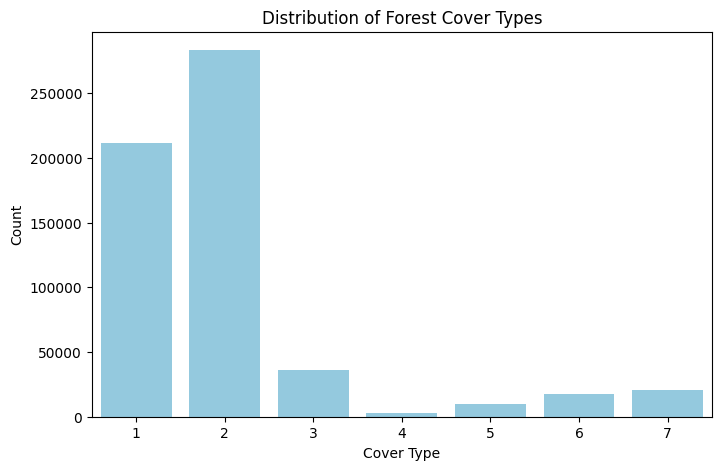

,proportion
Cover_Type,
2,0.487599
1,0.364605
3,0.061537
7,0.035300
6,0.029891
5,0.016339
4,0.004728


In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Cover_Type'],color = 'skyblue')
plt.title("Distribution of Forest Cover Types")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()

df['Cover_Type'].value_counts(normalize=True)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
X_train.shape

(464809, 54)

In [37]:
df.nunique()

,0
Elevation,1978
Aspect,361
Slope,67
Horizontal_Distance_To_Hydrology,551
Vertical_Distance_To_Hydrology,700
Horizontal_Distance_To_Roadways,5785
Hillshade_9am,207
Hillshade_Noon,185
Hillshade_3pm,255
Horizontal_Distance_To_Fire_Points,5827


# Logistic Regression

In [48]:

log_reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        multi_class='multinomial',
        max_iter=300,
        random_state=42
    ))
])

log_reg_params = {
    'clf__C': [1, 10],
    'clf__solver': ['lbfgs']
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

log_reg_grid = GridSearchCV(
    log_reg_pipe, log_reg_params, scoring='f1_macro',
    cv=cv, n_jobs=-1
)

print("\nTraining Logistic Regression...")
log_reg_grid.fit(X_train, y_train)

y_pred_lr = log_reg_grid.predict(X_test)

print("\nLogistic Regression Results:")
print("Best Params:", log_reg_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Macro F1:", f1_score(y_test, y_pred_lr, average='macro'))
print(classification_report(y_test, y_pred_lr))



Training Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Results:
Best Params: {'clf__C': 10, 'clf__solver': 'lbfgs'}
Accuracy: 0.7234322693906353
Macro F1: 0.5305899444884726
              precision    recall  f1-score   support

           1       0.71      0.70      0.70     42368
           2       0.75      0.80      0.77     56661
           3       0.68      0.80      0.73      7151
           4       0.61      0.43      0.51       549
           5       0.16      0.01      0.01      1899
           6       0.50      0.27      0.35      3473
           7       0.74      0.56      0.63      4102

    accuracy                           0.72    116203
   macro avg       0.59      0.51      0.53    116203
weighted avg       0.71      0.72      0.71    116203



# SVM

In [49]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(max_iter=5000))
])

svm_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', LinearSVC(max_iter=5000))])

In [96]:
from sklearn.metrics import accuracy_score

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.7114188101856235


#DNN

In [ ]:
y_train_oh = to_categorical(y_train - 1)
y_test_oh  = to_categorical(y_test - 1)


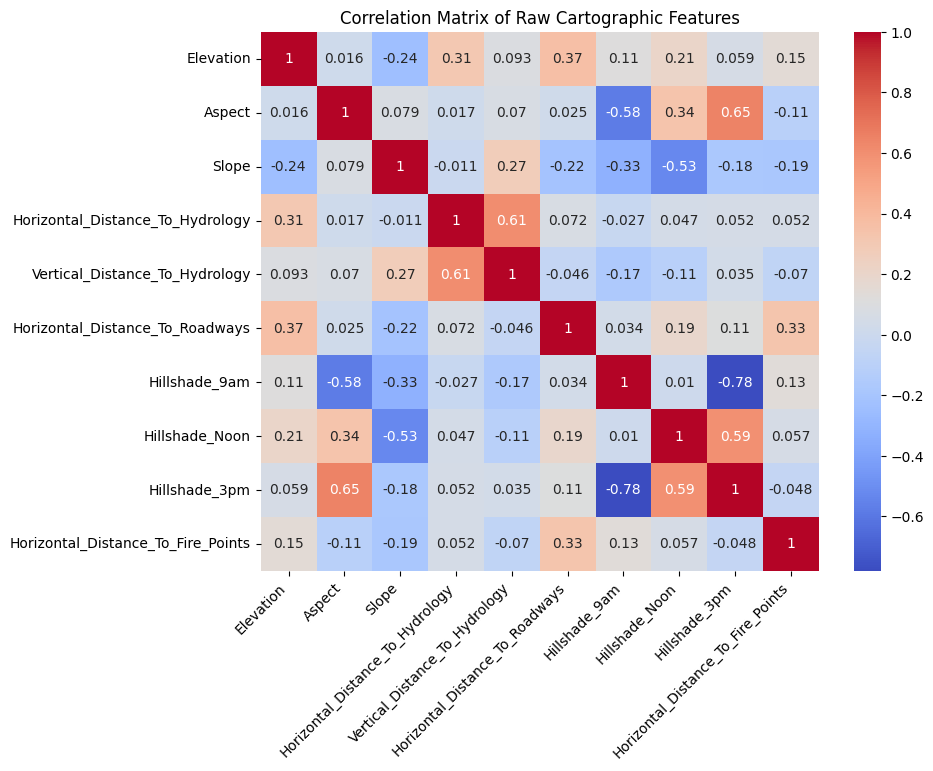

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 7))
ax = sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.title('Correlation Matrix of Raw Cartographic Features')
plt.show()

In [8]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [13]:
correlation_matrix = df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']].corr()
print("Correlation matrix calculated successfully.")

Correlation matrix calculated successfully.


In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(7, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train_oh,
    validation_split=0.1,
    epochs=40,
    batch_size=512,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.6562 - loss: 0.9985 - val_accuracy: 0.7659 - val_loss: 0.5535
Epoch 2/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7462 - loss: 0.6003 - val_accuracy: 0.7900 - val_loss: 0.4954
Epoch 3/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7653 - loss: 0.5476 - val_accuracy: 0.8048 - val_loss: 0.4614
Epoch 4/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7792 - loss: 0.5149 - val_accuracy: 0.8178 - val_loss: 0.4304
Epoch 5/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7920 - loss: 0.4887 - val_accuracy: 0.8270 - val_loss: 0.4108
Epoch 6/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.7999 - loss: 0.4700 - val_accuracy: 0.8347 - val_loss: 0.3900
Epoch 7/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - accuracy: 0.8065 - loss: 0.4554 - val_accuracy: 0.8426 - val_loss: 0.3760
Epoch 8/40
818/818 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.8118 - loss: 0.4461 - 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_oh, verbose=0)
print("Final Neural Network Test Accuracy:", test_acc)


Final Neural Network Test Accuracy: 0.8968356847763062
